# Micro Credit Project

This project is based upon the data fetched out of the telecom industry. It is based upon the different credit amount availed by various customers of telecom company. The credit amount availed is to be paid back by the customer with some fixed additional charges. We will try to figure out the need of the customers and also find defaulters in this program for future predictions through given attributes and columns in this dataset. we will try to build different models in this project and will choose the best model with most accuracy for the predictions.

In [1]:
# importing essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [2]:
#loading the dataset :
data= pd.read_csv('Micro_credit.csv',index_col=0)

In [3]:
#looking at the top 10 rows of the dataset :
data.head(10)

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
1       0  21408I70789   272.0   3055.050000   3065.150000    220.13   
2       1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
3       1  17943I70372   535.0   1398.000000   1398.000000    900.13   
4       1  55773I70781   241.0     21.228000     21.228000    159.42   
5       1  03813I82730   947.0    150.619333    150.619333   1098.90   
6       1  35819I70783   568.0   2257.362667   2261.460000    368.13   
7       1  96759I84459   545.0   2876.641667   2883.970000    335.75   
8       1  09832I90846   768.0  12905.000000  17804.150000    900.35   
9       1  59772I84450  1191.0     90.695000     90.695000   2287.50   
10      1  56331I70783   536.0     29.357333     29.357333    612.96   

    rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1     260.13                2.0                0.0              1539  ...   
2    3691.26               20.0                0.0              5787  ...   
3     900.13                3.0                0.0              1539  ...   
4     159.42               41.0                0.0               947  ...   
5    1098.90                4.0                0.0              2309  ...   
6     380.13                2.0                0.0              1539  ...   
7     402.90               13.0                0.0              5787  ...   
8    2549.11                4.0               55.0              3178  ...   
9    2287.50                1.0                0.0              1539  ...   
10    612.96               11.0                0.0               773  ...   

    maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1               6.0                 0.0          2.0            12   
2              12.0                 0.0          1.0            12   
3               6.0                 0.0          1.0             6   
4               6.0                 0.0          2.0            12   
5               6.0                 0.0          7.0            42   
6               6.0                 0.0          3.0            18   
7               6.0                 0.0          1.0             6   
8               6.0                 0.0          7.0            42   
9               6.0                 0.0          4.0            24   
10              6.0                 0.0          1.0             6   

    maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                 6                 0.0  29.000000  29.000000      UPW   
2                12                 0.0   0.000000   0.000000      UPW   
3                 6                 0.0   0.000000   0.000000      UPW   
4                 6                 0.0   0.000000   0.000000      UPW   
5                 6                 0.0   2.333333   2.333333      UPW   
6                 6                 0.0  11.000000   8.333333      UPW   
7                 6                 0.0   0.000000   0.000000      UPW   
8                 6                 0.0   6.000000   3.857143      UPW   
9                 6                 0.0   2.666667   2.666667      UPW   
10                6                 0.0   0.000000   0.000000      UPW   

         pdate  
1   2016-07-20  
2   2016-08-10  
3   2016-08-19  
4   2016-06-06  
5   2016-06-22  
6   2016-07-02  
7   2016-07-05  
8   2016-08-05  
9   2016-06-15  
10  2016-06-08  

[10 rows x 36 columns]

In [4]:
#looking at the bottom 10 rows of the dataset :
data.tail(10)

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
209584      1  30201I82732   935.0     15.550667     15.550667    140.44   
209585      0  70387I89237   945.0      0.000000      0.000000     78.30   
209586      1  12227I90843   793.0   5350.315333   5356.210000    594.80   
209587      1  60331I70370   254.0  20079.157333  20228.090000   4003.12   
209588      1  19900I95200   239.0  14678.000000  14704.900000  12935.26   
209589      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209590      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209591      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209592      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209593      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
209584    140.44                4.0                0.0              1547  ...   
209585     78.30                0.0                0.0                 0  ...   
209586    640.20                2.0                0.0              2309  ...   
209587   5173.74                2.0                0.0              1539  ...   
209588  16775.60                8.0                0.0              3178  ...   
209589   1089.19                1.0                0.0              4048  ...   
209590   1728.36                4.0                0.0               773  ...   
209591   8893.20                3.0                0.0              1539  ...   
209592    984.58                2.0               38.0               773  ...   
209593    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209584              6.0                 0.0          1.0             6   
209585              6.0                 0.0          1.0             6   
209586              6.0                 0.0          5.0            30   
209587             12.0                 0.0         15.0           120   
209588             12.0                 1.0          3.0            24   
209589              6.0                 0.0          2.0            12   
209590              6.0                 0.0          3.0            18   
209591             12.0                 0.0          6.0            54   
209592             12.0                 0.0          3.0            24   
209593             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209584                6                 0.0        0.0   0.000000      UPW   
209585                6                 0.0        0.0   0.000000      UPW   
209586                6                 0.0        5.2   5.200000      UPW   
209587               12                 0.0        3.0   2.400000      UPW   
209588               12                 1.0        0.0  30.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590                6                 0.0        1.0   1.000000      UPW   
209591               12                 0.0        4.0   3.833333      UPW   
209592               12                 0.0        0.0  10.500000      UPW   
209593               12                 0.0        0.0   0.000000      UPW   

             pdate  
209584  2016-06-02  
209585  2016-06-06  
209586  2016-07-04  
209587  2016-07-22  
209588  2016-08-02  
209589  2016-06-17  
209590  2016-06-12  
209591  2016-07-29  
209592  2016-07-25  
209593  2016-07-07  

[10 rows x 36 columns]

In [5]:
#checking the type of data in each column :
data.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [6]:
# total number of rows and columns :
data.shape

(209593, 36)

In [7]:
# let's check the column names :
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
# total information of the given data :
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [9]:
# let's check the null values :
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [10]:
# stastical analysis :
data.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

# Data Preprocessing

In [11]:
#let's check unique values in pcircle column :
data['pcircle'].nunique()

1

In [12]:
data['pcircle']

1         UPW
2         UPW
3         UPW
4         UPW
5         UPW
         ... 
209589    UPW
209590    UPW
209591    UPW
209592    UPW
209593    UPW
Name: pcircle, Length: 209593, dtype: object

In [13]:
#dropping the pcircle column 
data.drop('pcircle',axis=1,inplace=True)

In [14]:
#let's check unique values in pdate column
data['pdate'].nunique()

82

In [15]:
data['pdate']

1         2016-07-20
2         2016-08-10
3         2016-08-19
4         2016-06-06
5         2016-06-22
             ...    
209589    2016-06-17
209590    2016-06-12
209591    2016-07-29
209592    2016-07-25
209593    2016-07-07
Name: pdate, Length: 209593, dtype: object

In [16]:
data['pdate_day']=pd.to_datetime(data.pdate, format='%Y/%m/%d').dt.day

In [17]:
data['pdate_month']=pd.to_datetime(data.pdate, format='%Y/%m/%d').dt.month

In [18]:
data['pdate_year']=pd.to_datetime(data.pdate, format='%Y/%m/%d').dt.year

In [19]:
data.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  cnt_loans90  \
1                2.0                0.0              1539  ...          2.0   
2               20.0                0.0              5787  ...          1.0   
3                3.0                0.0              1539  ...          1.0   
4               41.0                0.0               947  ...          2.0   
5                4.0                0.0              2309  ...          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
1            12                6                 0.0  29.000000  29.000000   
2            12               12                 0.0   0.000000   0.000000   
3             6                6                 0.0   0.000000   0.000000   
4            12                6                 0.0   0.000000   0.000000   
5            42                6                 0.0   2.333333   2.333333   

        pdate  pdate_day  pdate_month  pdate_year  
1  2016-07-20         20            7        2016  
2  2016-08-10         10            8        2016  
3  2016-08-19         19            8        2016  
4  2016-06-06          6            6        2016  
5  2016-06-22         22            6        2016  

[5 rows x 38 columns]

In [20]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate', 'pdate_day', 'pdate_month', 'pdate_year'],
      dtype='object')

In [21]:
# dropping the initial pdate column that we split in 3 columns
data.drop('pdate',axis=1,inplace=True)

In [22]:
data.drop('pdate_year',axis=1,inplace=True)

In [23]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate_day', 'pdate_month'],
      dtype='object')

In [24]:
# label encoding the data in msisdn : 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['msisdn']=le.fit_transform(data['msisdn'])

In [25]:
data['msisdn']

1          40191
2         142291
3          33594
4         104157
5           6910
           ...  
209589     42866
209590    178248
209591     53995
209592    111388
209593    121263
Name: msisdn, Length: 209593, dtype: int32

In [26]:
data.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [27]:
# let's check correlation of each column in the datset through correlation matrix :
dfr=data.corr()
dfr

label    msisdn       aon  daily_decr30  \
label                 1.000000  0.001976 -0.003785      0.168298   
msisdn                0.001976  1.000000  0.000566      0.000717   
aon                  -0.003785  0.000566  1.000000      0.001104   
daily_decr30          0.168298  0.000717  0.001104      1.000000   
daily_decr90          0.166150  0.000950  0.000374      0.977704   
rental30              0.058085 -0.001404 -0.000960      0.442066   
rental90              0.075521 -0.000691 -0.000790      0.458977   
last_rech_date_ma     0.003728 -0.000928  0.001692      0.000487   
last_rech_date_da     0.001711  0.001400 -0.001693     -0.001636   
last_rech_amt_ma      0.131804 -0.002368  0.004256      0.275837   
cnt_ma_rech30         0.237331  0.000617 -0.003148      0.451385   
fr_ma_rech30          0.001330 -0.001804 -0.001163     -0.000577   
sumamnt_ma_rech30     0.202828  0.001094  0.000707      0.636536   
medianamnt_ma_rech30  0.141490  0.000668  0.004306      0.295356   
medianmarechprebal30 -0.004829 -0.000238  0.003930     -0.001153   
cnt_ma_rech90         0.236392 -0.001859 -0.002725      0.587338   
fr_ma_rech90          0.084385 -0.004413  0.004401     -0.078299   
sumamnt_ma_rech90     0.205793 -0.000936  0.001011      0.762981   
medianamnt_ma_rech90  0.120855 -0.000625  0.004909      0.257847   
medianmarechprebal90  0.039300 -0.000615 -0.000859      0.037495   
cnt_da_rech30         0.003827 -0.001720  0.001564      0.000700   
fr_da_rech30         -0.000027 -0.000241  0.000892     -0.001499   
cnt_da_rech90         0.002999  0.004595  0.001121      0.038814   
fr_da_rech90         -0.005418 -0.002233  0.005395      0.020673   
cnt_loans30           0.196283  0.001765 -0.001826      0.366116   
amnt_loans30          0.197272  0.002170 -0.001726      0.471492   
maxamnt_loans30       0.000248 -0.000755 -0.002764     -0.000028   
medianamnt_loans30    0.044589  0.000986  0.004664     -0.011610   
cnt_loans90           0.004733  0.001859 -0.000611      0.008962   
amnt_loans90          0.199788 -0.000155 -0.002319      0.563496   
maxamnt_loans90       0.084144  0.003286 -0.001191      0.400199   
medianamnt_loans90    0.035747  0.001210  0.002771     -0.037305   
payback30             0.048336  0.002922  0.001940      0.026915   
payback90             0.049183  0.002671  0.002203      0.047175   
pdate_day             0.006825  0.002466  0.000662      0.006477   
pdate_month           0.154949 -0.002986 -0.001863      0.518664   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
label                     0.166150  0.058085  0.075521           0.003728   
msisdn                    0.000950 -0.001404 -0.000691          -0.000928   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356 

# Data Visualization

1    87.517713
0    12.482287
Name: label, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


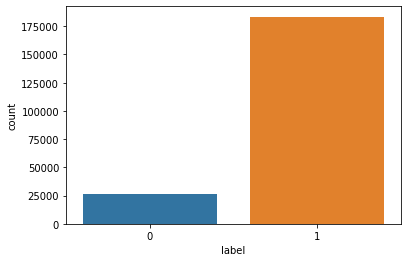

In [28]:
# Data Visualization of label count
print(data['label'].value_counts()/209593*100)
print(sns.countplot(data['label']))

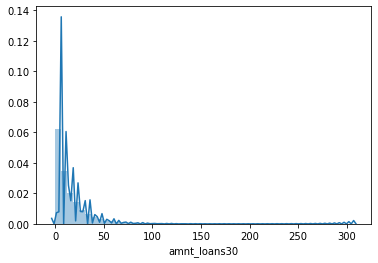

In [29]:
#distribution of loan amount among differnet customers :
sns.distplot(data['amnt_loans30'])

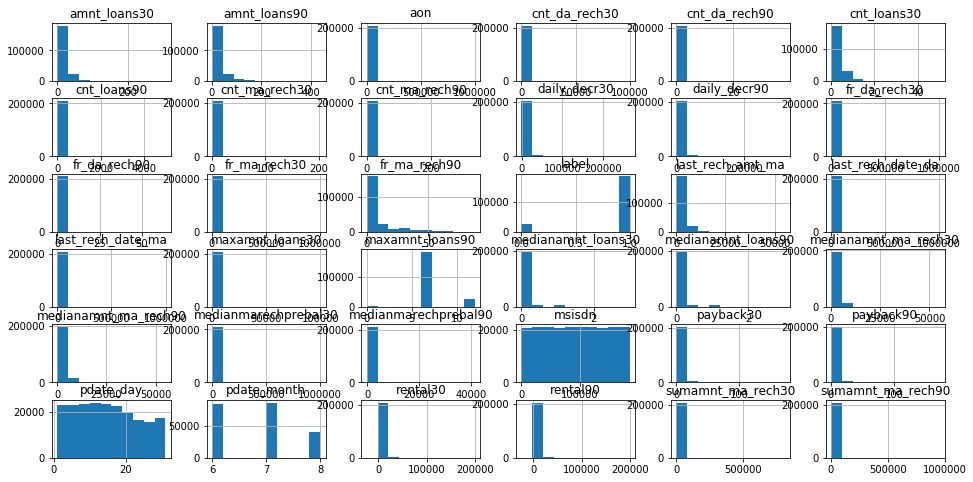

In [30]:
#relation of various columns among each other through histogram :
data.hist(figsize=(16,8))
plt.show()

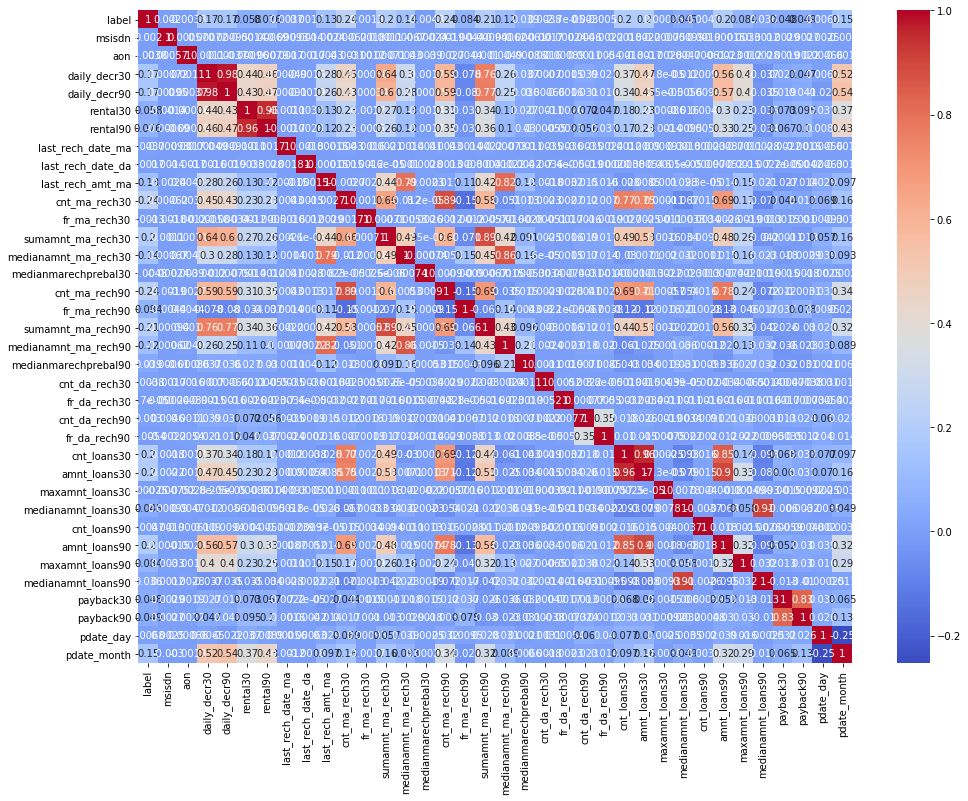

In [31]:
#data visualization of correlation through heatmap :
plt.figure(figsize=(16,12))
sns.heatmap(dfr,annot=True,cmap='coolwarm')

# Spliting the Data

In [32]:
# splitting the data into input and output :
X=data.drop('label',axis=1)
y=data['label']

In [33]:
#importing the train test split to fit the splitted data :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [34]:
# importing the standard scaler:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Importing sklearn libraries

In [35]:
# importing the libraries :
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# Model Building

In [36]:
# importing essential libraries :
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('**********************Accuracy score of************************',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\Users\Scp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**********************Accuracy score of************************ LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8756321765959477
[[  262  7639]
 [  181 54796]]
              precision    recall  f1-score   support

           0       0.59      0.03      0.06      7901
           1       0.88      1.00      0.93     54977

    accuracy                           0.88     62878
   macro avg       0.73      0.51      0.50     62878
weighted avg       0.84      0.88      0.82     62878



**********************Accuracy score of************************ DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
         

# Cross_val_Score

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [38]:
cross_val_score(rfc,X,y).mean()

0.9214477627709122

In [39]:
rfc.fit(X_train,y_train)
y_predict=rfc.predict(X_test)
y_predict

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_predict=rfc.predict(X_test)
y_predict

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
fpr,tpr,thresholds=roc_curve(y_test,y_predict)
print(fpr)
print(tpr)
print(thresholds)

[0.        0.4857613 1.       ]
[0.         0.97920949 1.        ]
[2 1 0]


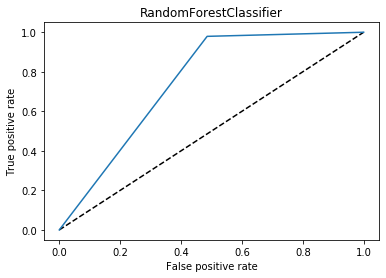

In [42]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

# Conclusion

We will go with RandomForest Classifier with 92% Accuracy  as it would be the best to give most accurate prediction for future use in determining providing credit amount & credit eligibilty.

In [43]:
import joblib
joblib.dump(rfc,'MICRO_CREDIT.csv')

['MICRO_CREDIT.csv']

In [44]:
model=joblib.load('MICRO_CREDIT.csv')

In [45]:
model.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)